In [1]:
import pandas as pd
df=pd.read_csv('IMDB Dataset.csv')

In [2]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

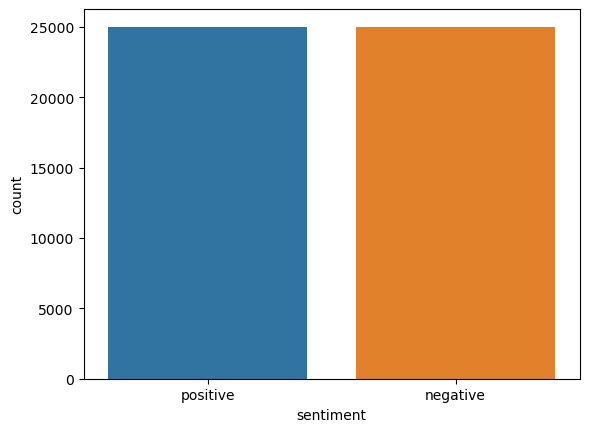

In [4]:
import seaborn as sns
sns.countplot(x='sentiment',data=df)

In [5]:
positive_review=list(df[df['sentiment']=='positive']['review'])
negative_review=list(df[df['sentiment']=='negative']['review'])

In [6]:
from wordcloud import WordCloud,STOPWORDS
from matplotlib import pyplot as plt 
stopwords=set(STOPWORDS)
# stopwords

In [7]:
def create_cloud(string, title=None):
    cloud = WordCloud(height=1080, 
                      width=1920, 
                      background_color='white', 
                      min_font_size=10, 
                      stopwords=STOPWORDS).generate(string)
    plt.figure(figsize=(10,20))
    plt.imshow(cloud, interpolation="bilinear")
    plt.axis("off")
    if title:
        plt.title(title, fontdict={'fontsize':24})
    plt.show()

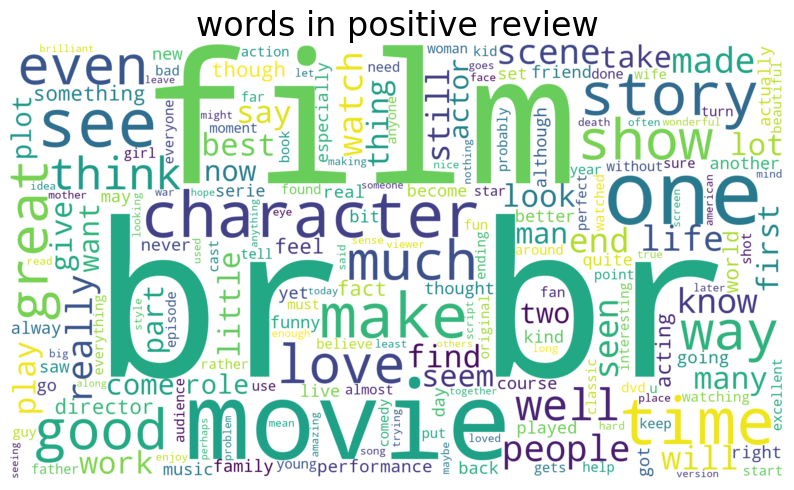

In [8]:
create_cloud(' '.join(positive_review).lower(),'words in positive review')

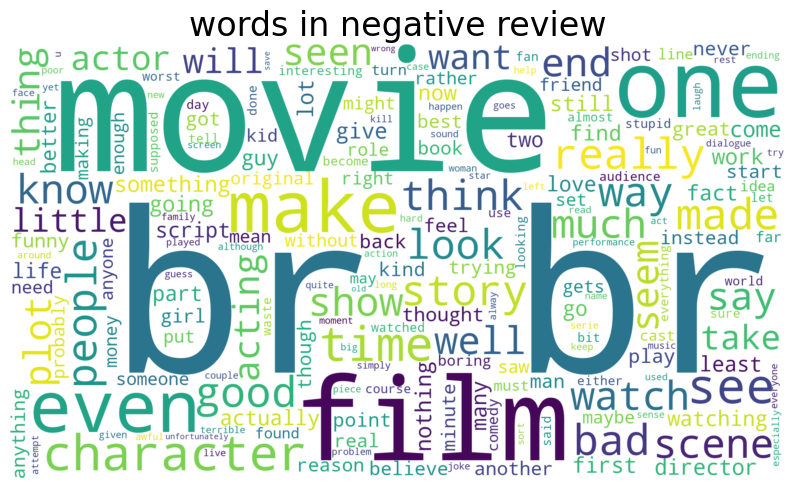

In [9]:
create_cloud(' '.join(negative_review).lower(),'words in negative review')

In [10]:
def text_processing(data):
    from bs4 import BeautifulSoup
    import re
    def decontracted(phrase):
        # specific
        phrase= re.sub(r'<br /><br />',' ',phrase)
        phrase = re.sub(r"won't", "will not", phrase)
        phrase = re.sub(r"can\'t", "can not", phrase)

        # general
        phrase = re.sub(r"n\'t", " not", phrase)
        phrase = re.sub(r"\'re", " are", phrase)
        phrase = re.sub(r"\'s", " is", phrase)
        phrase = re.sub(r"\'d", " would", phrase)
        phrase = re.sub(r"\'ll", " will", phrase)
        phrase = re.sub(r"\'t", " not", phrase)
        phrase = re.sub(r"\'ve", " have", phrase)
        phrase = re.sub(r"\'m", " am", phrase)
        phrase = re.sub(r'"', " ", phrase)
        return phrase
    stopwords=set(STOPWORDS)

    # Combining all the above stundents 
    from tqdm import tqdm
    preprocessed_reviews = []
    # tqdm is for printing the status bar
    for sentance in tqdm(data['review'].values):
        sentance = re.sub(r"http\S+", "", sentance)
        sentance = BeautifulSoup(sentance, 'lxml').get_text()
        sentance = decontracted(sentance)
        sentance = re.sub("\S*\d\S*", "", sentance).strip()
        # https://gist.github.com/sebleier/554280
        sentance = ' '.join(e.lower() for e in sentance.split() if e not in stopwords)
        preprocessed_reviews.append(sentance.strip())
    
    from nltk.stem import PorterStemmer

    porter = PorterStemmer()
    list2=[]
    for  sentence in preprocessed_reviews:
      list1=[]
      for words in sentence.split():
        list1.append(porter.stem(words))

      list2.append(' '.join(list1))
    return(list2)

In [11]:
x=text_processing(df)

  1%|▉                                                                           | 641/50000 [00:00<00:24, 1984.68it/s]C:\Users\HP\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:23<00:00, 2119.96it/s]


In [12]:
df['cleaned_review']=x

In [13]:
df.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod will hooked...
1,A wonderful little production. <br /><br />The...,positive,a wonder littl production. the film techniqu u...
2,I thought this was a wonderful way to spend ti...,positive,i thought wonder way spend time hot summer wee...
3,Basically there's a family where a little boy ...,negative,basic famili littl boy (jake) think zombi clos...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...


In [14]:
X = df['cleaned_review']
Y = df['sentiment']

In [15]:
Y = list(Y)
for i in range(len(Y)):
    if Y[i]=='positive':
        Y[i]=1
    else:
        Y[i]=0
        
df['sentiment_score']=Y

Y=df['sentiment_score']

In [16]:
df

,review,sentiment,cleaned_review,sentiment_score
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod will hooked...,1
1,A wonderful little production. <br /><br />The...,positive,a wonder littl production. the film techniqu u...,1
2,I thought this was a wonderful way to spend ti...,positive,i thought wonder way spend time hot summer wee...,1
3,Basically there's a family where a little boy ...,negative,basic famili littl boy (jake) think zombi clos...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...,1
...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,i thought movi right good job. it creativ orig...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,"bad plot, bad dialogue, bad acting, idiot dire...",0
49997,I am a Catholic taught in parochial elementary...,negative,i cathol taught parochi elementari school nuns...,0
49998,I'm going to have to disagree with the previou...,negative,i go disagre previou comment side maltin one. ...,0


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X[:1000], Y[:1000], test_size=0.3, random_state=0)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700,), (300,), (700,), (300,))

In [19]:
list(y_test).count(1)

138

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [21]:
X_train_bow.shape,X_test_bow.shape

((700, 12936), (300, 12936))

In [22]:
# principal_breast_Df

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
for i in range(13,22):
    
    print('K',i)
    
    # initialization
    neigh = KNeighborsClassifier(n_neighbors=i)
    
    # Training
    neigh.fit(X_train_bow, y_train)
    
    # Test the training data
    y_pred_train = neigh.predict(X_train_bow)
    accuracy_train = accuracy_score(y_pred_train,y_train)
    
    # Test the test data
    y_pred_test = neigh.predict(X_test_bow)
    accuracy_test = accuracy_score(y_pred_test,y_test)
    
    print(accuracy_train,accuracy_test)

K 13
0.6614285714285715 0.5066666666666667
K 14
0.6914285714285714 0.53
K 15


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

0.6528571428571428 0.5166666666666667
K 16
0.6742857142857143 0.5366666666666666
K 17
0.6414285714285715 0.5233333333333333
K 18


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

0.6571428571428571 0.56
K 19
0.6257142857142857 0.5133333333333333
K 20
0.6428571428571429 0.5533333333333333
K 21
0.6071428571428571 0.5266666666666666


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
    
# initialization
neigh = KNeighborsClassifier(n_neighbors=20)

# Training
neigh.fit(X_train_bow, y_train)

# Test the training data
y_pred_train = neigh.predict(X_train_bow)
accuracy_train = accuracy_score(y_pred_train,y_train)
f1_train = f1_score(y_pred_train,y_train)


# Test the test data
y_pred_test = neigh.predict(X_test_bow)
accuracy_test = accuracy_score(y_pred_test,y_test)
f1_test = f1_score(y_pred_test,y_test)


print(accuracy_train,accuracy_test)
print(f1_train,f1_test)

0.6428571428571429 0.5533333333333333
0.7203579418344519 0.6417112299465241


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

In [25]:
from sklearn.metrics import classification_report
target_names = ['Postive', 'Negative']
print(classification_report(y_pred_test, y_test, target_names=target_names))
print(classification_report(y_pred_train, y_train, target_names=target_names))

              precision    recall  f1-score   support

     Postive       0.28      0.72      0.41        64
    Negative       0.87      0.51      0.64       236

    accuracy                           0.55       300
   macro avg       0.58      0.61      0.52       300
weighted avg       0.74      0.55      0.59       300

              precision    recall  f1-score   support

     Postive       0.38      0.76      0.51       169
    Negative       0.89      0.61      0.72       531

    accuracy                           0.64       700
   macro avg       0.63      0.68      0.61       700
weighted avg       0.76      0.64      0.67       700



In [26]:
from sklearn.metrics import confusion_matrix
c= confusion_matrix(y_pred_train, y_train)
c

array([[128,  41],
       [209, 322]], dtype=int64)

<AxesSubplot:>

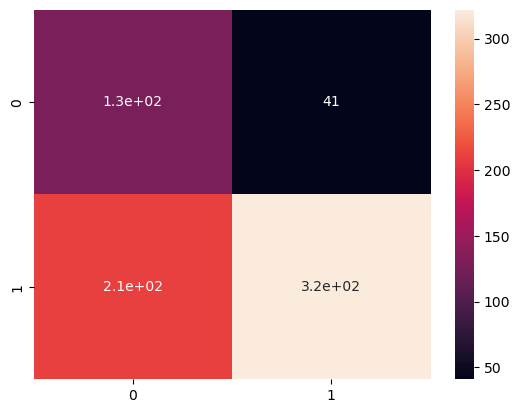

In [27]:
import seaborn as sns
sns.heatmap(c, annot=True)

In [28]:
# random search cv
# grid search cv

# hyperparameter 

In [29]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors':[10,12,14,16,18, 20],'p':[1,2]}
neigh = KNeighborsClassifier()

clf = GridSearchCV(neigh, parameters)
clf.fit(X_train_bow, y_train)

y_pred_train = clf.predict(X_train_bow)
print(classification_report(y_pred_train, y_train, target_names=target_names))
# >>> sorted(clf.cv_results_.keys())

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

              precision    recall  f1-score   support

     Postive       0.57      0.73      0.64       262
    Negative       0.80      0.67      0.73       438

    accuracy                           0.69       700
   macro avg       0.69      0.70      0.68       700
weighted avg       0.72      0.69      0.69       700



C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [30]:
clf.best_params_

{'n_neighbors': 10, 'p': 2}

In [31]:
neigh = KNeighborsClassifier(n_neighbors=100, p=1)
neigh.fit(X_train_bow, y_train)

y_pred_train = clf.predict(X_train_bow)
print(classification_report(y_pred_train, y_train, target_names=target_names))

              precision    recall  f1-score   support

     Postive       0.57      0.73      0.64       262
    Negative       0.80      0.67      0.73       438

    accuracy                           0.69       700
   macro avg       0.69      0.70      0.68       700
weighted avg       0.72      0.69      0.69       700



C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
